# Sequential data engineering Kevin

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from Modules import *
sns.set()
%matplotlib inline

In [3]:
df, y = read_data('../default_of_credit_card_clients.xls')
df = proc_cat_df(df)


df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,Y,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,1,0,0,0,1,1,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,0,2000,1,1,0,0,0,1,0,1
3,90000,34,0,0,0,0,0,0,29239,14027,...,1000,5000,0,1,0,0,0,1,0,1
4,50000,37,0,0,0,0,0,0,46990,48233,...,1069,1000,0,1,0,0,0,1,1,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,689,679,0,0,1,0,0,1,1,0


## Sequential Data Feature Engineering

In the following code, we will engineer some new features based on the sequential information given in the PAY_AMT and BILL_AMT columns.

First, we calculate the amount of outstanding balance remaining for a client after he/she has payed a bill. This is simply the difference of a bill amount for a time period and the amount payed for that time period.

In [5]:
# created new feature OUTSTANDING_BAL for each period

df["OUTSTANDING_BAL1"] = (df.BILL_AMT1 - df.PAY_AMT1)
df["OUTSTANDING_BAL2"] = (df.BILL_AMT2 - df.PAY_AMT2)
df["OUTSTANDING_BAL3"] = (df.BILL_AMT3 - df.PAY_AMT3)
df["OUTSTANDING_BAL4"] = (df.BILL_AMT4 - df.PAY_AMT4)
df["OUTSTANDING_BAL5"] = (df.BILL_AMT5 - df.PAY_AMT5)
df["OUTSTANDING_BAL6"] = (df.BILL_AMT6 - df.PAY_AMT6)



Next, we'll create new logical variables; these will indicate whether the outstanding balance value has increased (1) or not (0) from the previous period.

In [ ]:
#create logical variable: 
#if the outstanding balance for period t-1 is less than period t: 0
#if the outstanding balance for perriod t-1 is more than period t: 1

lst1 = ['OUTSTANDING_BAL1','OUTSTANDING_BAL2', 'OUTSTANDING_BAL3', 'OUTSTANDING_BAL4','OUTSTANDING_BAL5']
lst2 = ['OUTSTANDING_BAL2','OUTSTANDING_BAL3', 'OUTSTANDING_BAL4', 'OUTSTANDING_BAL5','OUTSTANDING_BAL6',]
for idx, (column1, column2) in enumerate(zip(lst1, lst2)):
    idx += 1
    df[f"OUSTANDING_BAL{idx}_INDICATOR"] = np.where(df[column1] > df[column2], 1, 0)


#possible idea: do a ratio of how much your outstanding balance grew from t-1 to t ((new-old)/old)

Now, we'll do a similar process for the following: we'll calculate a ratio of how much a client's outstanding balance compares to his or her LIMIT_BAL of the account. Then we'll again create a logical variable indicating whether the balance of the current time period has increased (1) or not (0) from the previous time period.

In [ ]:
#created new column %_LIMIT_BAL for each month
#oustanding balance of period t divided by LIMIT_BAL 
#how close is a client reaching that LIMIT_BAL limit?

df["PERCENT_OF_LIMIT_BAL1"] = (df.OUTSTANDING_BAL1 / df.LIMIT_BAL)
df["PERCENT_OF_LIMIT_BAL2"] = (df.OUTSTANDING_BAL2 / df.LIMIT_BAL)
df["PERCENT_OF_LIMIT_BAL3"] = (df.OUTSTANDING_BAL3 / df.LIMIT_BAL)
df["PERCENT_OF_LIMIT_BAL4"] = (df.OUTSTANDING_BAL4 / df.LIMIT_BAL)
df["PERCENT_OF_LIMIT_BAL5"] = (df.OUTSTANDING_BAL5 / df.LIMIT_BAL)
df["PERCENT_OF_LIMIT_BAL6"] = (df.OUTSTANDING_BAL6 / df.LIMIT_BAL)



In [9]:
#if the outstanding balance for period t-1 is less than period t: 0
#if the outstanding balance for perriod t-1 is more than period t: 1

lst1 = ['PERCENT_OF_LIMIT_BAL1', 'PERCENT_OF_LIMIT_BAL2', 'PERCENT_OF_LIMIT_BAL3', 'PERCENT_OF_LIMIT_BAL4', 'PERCENT_OF_LIMIT_BAL5']
lst2 = ['PERCENT_OF_LIMIT_BAL2', 'PERCENT_OF_LIMIT_BAL3', 'PERCENT_OF_LIMIT_BAL4', 'PERCENT_OF_LIMIT_BAL5', 'PERCENT_OF_LIMIT_BAL6']
for idx, (column1, column2) in enumerate(zip(lst1, lst2)):
    idx += 1
    df[f"PERCENT_OF_LIMIT_BAL{idx}_INDICATOR"] = np.where(df[column1] > df[column2], 1, 0)



### what ratio of the bill are they paying?
### similar to oustanding balance, might have to choose

Here, we will calculate what percentage of the bill the client is paying off each time period. Then, we'll create a logical variable indicating whether the ratio of the current time period is increaseing (1) or not (0) compared to the previous time period.

In [10]:
#describe the percentage of the bill that clients are paying
#have to set if a bill amt is 0, will be the same as the previous time periods value
#therefore, have to initialize the the time period, t = 6 values first 

lst1 = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4','BILL_AMT5', 'BILL_AMT6']
lst2 = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for idx, (col1, col2) in enumerate(zip(lst1, lst2)):
    idx +=1
    df[f"PAY_RATIO{idx}"] = np.where(df[col1] != 0, df[col2]/df[col1], 1)


In [12]:
#define pay_ratio_indicator

lst1 = ['PAY_RATIO1', 'PAY_RATIO2', 'PAY_RATIO3', 'PAY_RATIO4', 'PAY_RATIO5']
lst2 = ['PAY_RATIO2', 'PAY_RATIO3', 'PAY_RATIO4', 'PAY_RATIO5', 'PAY_RATIO6']
for idx, (column1, column2) in enumerate(zip(lst1, lst2)):
    idx += 1
    df[f"PAY_RATIO{idx}_INDICATOR"] = np.where(df[column1] > df[column2], 1, 0)

In [13]:
df.head().T

,1,2,3,4,5
LIMIT_BAL,20000.000000,120000.000000,90000.000000,50000.000000,50000.000000
AGE,24.000000,26.000000,34.000000,37.000000,57.000000
PAY_1,2.000000,-1.000000,0.000000,0.000000,-1.000000
PAY_2,2.000000,2.000000,0.000000,0.000000,0.000000
PAY_3,-1.000000,0.000000,0.000000,0.000000,-1.000000
PAY_4,-1.000000,0.000000,0.000000,0.000000,0.000000
PAY_5,-2.000000,0.000000,0.000000,0.000000,0.000000
PAY_6,-2.000000,2.000000,0.000000,0.000000,0.000000
BILL_AMT1,3913.000000,2682.000000,29239.000000,46990.000000,8617.000000
BILL_AMT2,3102.000000,1725.000000,14027.000000,48233.000000,5670.000000


## Evaluate

Using the same evaluation code as the data with no such feature engineering, we'll evaluate whether the new features increase the model's performance.

In [14]:
results = XGBoost_evaluate(df)

Text(15,0.75,'final auc-mean score: 0.8063266666666666')

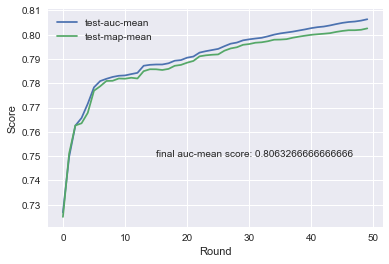

In [19]:
results[['test-auc-mean', 'test-map-mean']].plot()
plt.xlabel('Round')
plt.ylabel('Score')
plt.annotate(xy = (15,.75), s='final auc-mean score: ' +str(results['test-auc-mean'][49]))